# Chapter 4. NumPy Basics: Arrays and Vectorized Computation

*NumPy* is the *lingua francas* of numerical data exchange in the Python data science ecosystem:
- `ndarry` is an efficient multidimensional array with fast computing abilities
- tools for reading/writing array data to disy and working with memory-mapped files
- Linear algebra, random number generation, and FFT
- A C-API

In this chatper, we will learn some important data analysis using NumPy:
- `ndarry` arithmetic, indexing, slicing, Boolean and fancy indexing, transposing
- Pseudorandom number generation
- Universal Functions (`ufunc`)
- Array-oriented programming
- File I/S with arrays
- Linear algebra
- An example—random walks

In [159]:
# Let's practice with ndarry
import numpy as np

data = np.array([[1.5, -0.1, 3],[0, -3, 6.5]])

# Three key attributes: ndim, shape, dtype
data.shape # (2, 3)
data.dtype # dtype('float64')
data.ndim # 2

2

In [160]:
# Creating ndarry
data1 = [6, 7, 8, 1, 2, 4]
data1_array = np.array(data1)
data1_array # array([6, 7, 8, 1, 2, 4])

# reshape
data1_array = data1_array.reshape(2, 3)
data1_array.shape # (2, 3)

# special functions to create ndarray
np.zeros(10)
np.ones((2, 3))
np.empty((2, 3, 4)) # filling with random tiny numbers
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [161]:
data1 = [6, 7, 8, 1, 2, 4]
data1_array = np.array(data1)
data1_asarray = np.asanyarray(data1)

In [162]:
import math
np.full((2,3), math.pi, dtype=np.int16)

array([[3, 3, 3],
       [3, 3, 3]], dtype=int16)

### NumPy Array Creation Functions

| Function | Description |
|----------|-------------|
| `array` | Convert input (list, tuple, array, or other sequence type) to an ndarray; copies the input data by default |
| `asarray` | Similar to `array` but do not copy if the input is already an ndarray |
| `arange` | Similar to `range` but returns an ndarray instead of a list |
| `ones`, `ones_like` | Produce an array of 1's |
| `zeros`, `zeros_like` | Produce an array of 0's |
| `empty`, `empty_list` | Produce an array of random tiny numbers |
| `full`, `full_like` | Produce an array of one specified number |
| `eye`, `identify` | Produce an $N \times N$ identify matrix |

### NumPy Data Types (`dtype`)

The most common `dtypes` include:

| Type | Type Code | Description |
|------|-----------|-------------|
| `int32`, `uint32` | `i4`,`u4` | Signed and unsigned 32-bit integer types |
| `float64` | `f8` or `d` | Standard double-precision floating point; compatible with C double and Python `float` object |
| `bool` | `?` | Boolean type: `True` or `False` |
| `object` | `O` | Python object |
| `str_` | `S` | Fixed-length ASCII string type |
| `bytes` | `U` | Fixed-length Unicode type |

*Type casting*: You can convert or *cast* an array from one data type to another with `astype` method.

In [163]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype # dtype('int64')

arr_float = arr.astype(np.float64)
arr_float.dtype # dtype('float64')

import math
arr2 = np.full((2, 3), math.pi)
arr2_int = arr2.astype(np.int32)

arr3 = np.array(["1.2", "3.5", "5"], dtype=np.str_)
arr3_float = arr3.astype(np.float64)
arr3_float # array([1.2, 3.5, 5. ])

array([1.2, 3.5, 5. ])

### Arithmetic with NumPy Arrays

Arithmetic operations are vectorized in NumPy, so they are fast and efficient. All arithmetic operations are done element-wise, with broadcasting rules.

In [164]:
arr1 = np.arange(1, 7).reshape(2, 3)
arr2 = np.array([[0, 4., 1.], [7, 2, 12]])
arr1 > arr2

array([[ True, False,  True],
       [False,  True, False]])

In [165]:
# Review: list slicing & assignment
my_list = [1, 2, 3, 4, 5, 6]
my_list[2:4] = [100, 100]

# Array slicing and assignment
arr1 = np.arange(1, 7)
arr1[2:4] = 100 # array([  1,   2, 100, 100,   5,   6])


> One key difference between np.array and Python (or R) is that array slicing are views on the original array. Therefore, even if you re-assign the array to another name, changes the new array are still reflected in the original array. If you want to keep the original array intact, you need to use `new_array = original_array.copy()`.

In [166]:
arr1 = np.arange(1, 7)
new_arr = arr1
new_arr[2:4] = 100
print(arr1) # [  1   2 100 100   5   6]

# To add your original array intact
new_arr2 = arr2.copy()
new_arr2[0] = 99
print(arr1) # [  1   2 100 100   5   6]

[  1   2 100 100   5   6]
[  1   2 100 100   5   6]


In [167]:
# Indexing/slicing higher dimensional arrays
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[0] # row selection
arr2d[:,1] # col selection
arr2d[0][1] # element selection
arr2d[0, 1] # same as above

np.int64(2)

In [168]:
# Multi-dimensional array slicing
arr3d = np.arange(1, 13).reshape(2, 2, 3)
original = arr3d[0][1].copy()
arr3d[0][1] = 100
arr3d[0][1] = original
original.ndim


1

> Note: With slicing, if you use a single integer, it drops that dimension; while if you use slicing (e.g., `1:2`), that dimension is preserved (although it can be $1$).

In [169]:
# The difference between indexing and slicing 
arr2d = np.arange(1, 13).reshape(3, 4)
arr2d_dropdim = arr2d[0, 1:3] # array([2, 3])
arr2d_dropdim.shape # (2,) 
arr2d_dropdim.ndim # 1

arr2d_presdim = arr2d[0:1, 1:3] # array([[2, 3]])
arr2d_presdim.shape # (1, 2)
arr2d_presdim.ndim # 2

2

### Boolean Indexing

In [170]:
names = np.array(['Bob', 'Joe', 'Adam', 'Bob', 'Chris'])
data = np.arange(1, 16).reshape(5, 3)

# select when name is Bob
data[names == 'Bob']

# select name is not Bob—equivalent approaches
data[names == 'Bob']
data[~(names == 'Bob')]

condition = names == "Bob"
data[~condition]

# If you need and (&), or (|)
data[(names == "Bob") | (names == "Joe"), 1:3]

array([[ 2,  3],
       [ 5,  6],
       [11, 12]])

In [171]:
arr2d = np.arange(1, 13).reshape(3, 4)

# negative indexing
arr2d[:, -1] # array([ 4,  8, 12])

# note the difference of single vs double square brackets
arr2d[1, 2] # one element, 7
arr2d[[1, 2]] # rows 1 & 2: shape (2,4)

# fancy indexing
arr2d[:, [3, 1]] # shape (3,2)
arr2d[[0, 2], [1, 3]] # two elements (0,1) and (2,3) -> array([ 2, 12])

array([ 2, 12])

In [172]:
# To transpose, you can use either .T or .transpose()
arr2d.T
arr2d.transpose()

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [173]:
# Matrix dot product—equivalent approaches
arr2d @ arr2d.T
np.dot(arr2d, arr2d.T)

array([[ 30,  70, 110],
       [ 70, 174, 278],
       [110, 278, 446]])

In [174]:
# Transpose is a special case of swapaxes
arr2d.swapaxes(0, 1)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## Pseudorandom Number Generation

The `numpy.random` module supplements the built-in Python `random` module with fast array random number generation.

Although you could use functions such as `np.random.standard_normal(size=(n,m))`, it's considered best practice to create a generator first with `rng = np.random.default_rng(seed=42)`. The generator object `rng` is also isolated from other code which might use the `nuumpy.random` module.

Some common random number generator methods:
- `permutation` returns a random permutation of a sequence
- `shuffle` randomly permutes a sequence in place
- `uniform` draws sample from a uniform distribution
- `integers` draws random integers from a given low-to-high range
- `standard_normal` draws from a standard normal distribution
- `normal` draws from a normal distribution
- `uniform` draws samples from a uniform (0,1) distribution

In [175]:
from random import normalvariate
N = 1_000_000
%timeit sample = [normalvariate(0, 1) for _ in range(N)]

347 ms ± 6.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [176]:
%timeit np.random.standard_normal(N)

15.4 ms ± 319 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [177]:
# Create a generator
rng = np.random.default_rng(seed=42)
type(rng) # numpy.random._generator.Generator

numpy.random._generator.Generator

In [178]:
# Let's give it a try
random_data = rng.standard_normal((2, 3)) # note the double parenthesis

In [179]:
out = np.zeros_like(arr2d)
out

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

## Universal Functions: Fast Element-Wise Array Functions

A *universal* function or *ufunc* is a function that performs element-wise array operations on ndarrys.

Common *unary* ufuncs:
- `abs` and `fabs` compute absolute values
- `sqrt` and `square` compute square root and square
- `exp` computes exponential $e^{x}$
- `log`, `log10`, `log2`, and `log1p` represent natural log ($e$), $log_{10}$, $log_{2}$ and $log(1+x)$
- `sign` compute the sign of each element: `1` (pos), `0`, and `-1` (neg)
- `ceil` and `floor`
- `rint` rounds to the nearest integer
- `modf` returns fractional and integer parts of array
- `isnan` returns Boolean array indicating whether each element is `NaN`
- `isfinite`, `isinf` returns whether each element is finite or infinite, respectively
- `logical_not` is equivalent to `~arr`

Common binary ufuncs:
- `add`, `subtract`, `multiply`, `divide`, `floor_divide`, `power`
- `maximum`, `fmax`, `minimum`, `fmin`, `mod`
- `copysign`
- `greater`, `greater_equal`, `less`, `less_equal`, `equal`, `not_equal`
- `logical_and` (&), `logical_or` (|), `logical_xor` (^)


In [180]:
# A simple demonstration of how meshgrid works
x = np.array([1, 2, 3])
y = np.array([4, 5])
X, Y = np.meshgrid(x, y)
print(f"X = {X}")
print(f"Y = {Y}")

X = [[1 2 3]
 [1 2 3]]
Y = [[4 4 4]
 [5 5 5]]


# Array-Based Programming with NumPy

NumPy (similar to R) focuses on array-based computing, called vectorization, which is significantly faster than writing loops.

Text(0.5, 1.0, 'Image plot of $sqrt{x^2+y^2}$ for a grid of values')

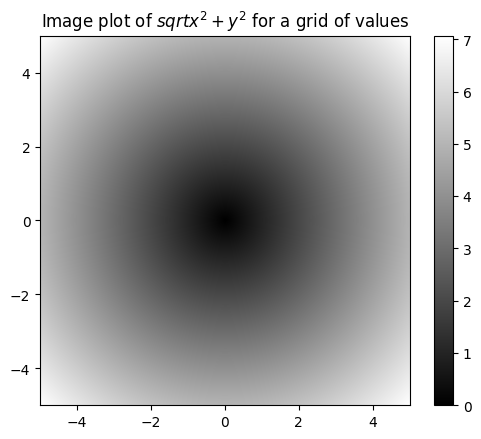

In [183]:
# An example with meshgrid
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)

# Plotting
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $sqrt{x^2+y^2}$ for a grid of values")

In [204]:
# Conditional statement with np.where
# Example 1
xarr = np.arange(1, 6)
yarr = np.arange(0.1, 0.6, 0.1)
cond = np.array([True, True, False, False, False])
newarr = np.where(cond, xarr, yarr)
print(newarr)

# Example 2: replacing pos with 2/neg with -2
ranarr = np.random.standard_normal((3,5))
ranarr2 = np.where(ranarr > 0, 2, -2)

# Example 3: replacing NAs with row means
ranarr[0,0] = np.nan
ranarr[1,3] = np.nan
mask = np.isnan(ranarr) # finding NaN cells
row_means = np.nanmean(ranarr, axis=1)
ranarr_full = np.where(mask, row_means[:, None], ranarr)


[1.  2.  0.3 0.4 0.5]


> The example above highlights a few tricks:
- `np.nan` is `NaN` in NumPy
- `np.isnan` identifies all `NaN`
- `np.nanmean` computes means from non-missing values
- `axis=1` is by row (a bit counterintuitive)
- If you want to add a new dimension in NumPy, you use `arr[:, None]`

### Mathematical and Statistical Methods

Many aggregations (aka *reductions*) can be achieved with either array instance methods (e.g., `arr.mean()`) or NumPy functions (e.g., `np.mean()`).

Here is a list of common array statistical methods:
- `sum`, `mean`, `std`, `var`, `min`, `max`
- `argmin`, `argmax`
- `cumsum`, `cumprod`

In [220]:
# Mathematical and Statical Methods
rng = np.random.default_rng(seed=42)
ranarr = rng.standard_normal((3,5))
ranarr.mean() # -0.0025161284657094812
np.mean(ranarr) # -0.0025161284657094812

# compute over the rows (axis=1) or cols (axis=0)
# 0 means down the row, while 1 means across the cols
ranarr.sum(axis=1) # row sum
ranarr.mean(axis=0) # col avg

# cumsum and cumprod produce the same size array
ranarr.cumsum()

# The row/col cumsum is different from typical axis
# 0 means down the row, while 1 means across the cols
arr = np.arange(1, 7).reshape(2, 3)
print(f"down the rows: {arr.cumsum(axis=0)}")
print(f"across the cols: {arr.cumsum(axis=1)}")


down the rows: [[1 2 3]
 [5 7 9]]
across the cols: [[ 1  3  6]
 [ 4  9 15]]


In [230]:
# Boolean array operations
# Because True=1 and False=0, you can use sum() to count for number of True
# and mean() for percentage of True
(ranarr >= 0).sum() # np.int64(9)
(ranarr >= 0).mean() # np.float64(0.6)

np.float64(0.6)

In [238]:
bool = (arr >= 3)
bool.any() # np.True_
bool.all() # np.False_


np.False_

In [242]:
# Array sorting
ranarr.sort()

array([[-1.95103519, -1.03998411,  0.30471708,  0.7504512 ,  0.94056472],
       [-1.30217951, -0.85304393, -0.31624259, -0.01680116,  0.1278404 ],
       [ 0.0660307 ,  0.46750934,  0.77779194,  0.87939797,  1.12724121]])

In [255]:
ranarr = rng.standard_normal((3, 5))
ranarr.sort(axis=1) # across the cols, in place
ranarr.sort(axis=0) # down the rows, in place

None


In [261]:
# If you need to preserve the original array, you have to use array functions (not methods)
ranarr = rng.standard_normal((3, 5))

# approach 1
ranarr2 = np.sort(ranarr, axis=0)

# approach 2
ranarr3 = ranarr.copy() # make a copy first
ranarr3.sort(axis=0)

array([[-0.47152481,  0.15256251, -0.37191458, -2.56665844, -0.23685026],
       [-0.25197738,  0.2637172 ,  0.0524668 , -1.75672178, -0.10348827],
       [ 0.17651242,  0.29599399,  1.47149197, -0.29217119,  0.32799548]])

In [266]:
# Examples of set logic

# unique() will identify unique elements and sort them
names = np.array(['Alan', 'John', 'Christine', 'John'])
np.unique(names)

# intersect1d(x, y) will compute the sorted common elements in both x and y
names2 = np.array(['Jane', 'Alan'])
np.intersect1d(names, names2)

# in1d(x, y) will compute a Boolean value for each element in x whether it's also in y
np.isin(names2, names)

array([False,  True])

In [271]:
# File I/S
# Saving array to disk
np.save('ranarr', ranarr)

# Loading array file
newarr = np.load('ranarr.npy')

array([[-0.47152481,  0.2637172 ,  0.0524668 , -0.29217119, -0.10348827],
       [-0.25197738,  0.15256251,  1.47149197, -2.56665844, -0.23685026],
       [ 0.17651242,  0.29599399, -0.37191458, -1.75672178,  0.32799548]])

In [281]:
# Matrix multiplications
x = np.arange(1, 7).reshape(2, 3)
y = np.ones((3, 2))
z1 = np.dot(x, y)
print(f"z: {z1}")

z2 = x.dot(y)
print(f"z2: {z2}")

z3 = x @ y 
print(f"z3: {z3}")

z: [[ 6.  6.]
 [15. 15.]]
z2: [[ 6.  6.]
 [15. 15.]]
z3: [[ 6.  6.]
 [15. 15.]]


## Common Lienar Algebra Functions

In NumPy, linear algebra functions are available in two ways.

Basic linear algebra functions are available as `np.*`:
- Products and contractions such as `np.dot`, `np.matmul` (sams as `@`), `np.vdot`, `np.inner`, `np.outer`, `np.tensordot`, `np.kron`
- Structure/diagonals: `np.diag`, `np.diagflat`, `np.diagonal`, `np.trace`, `np.triu`, `np.tril`
- Identify/constructors: `np.eye`, `np.identify`, `np.vander`
- Vector ops: `np.cross`

More advanced algorithms are in the `numpy.linalg` module:
- Solvers/inverse: `solve`, `inv`, `lstsq`
- Decompositions: `cholesky`, `qr`, `svd`
- Eigen/spectrum: `eig`, `eigh` (Hermitian/symeetric), `eigvals`, `eigvalsh`
- Matrix properties: `det`, `matrix_rank`, `norm`, `cond`

In [290]:
from numpy.linalg import diagonal

squarem = rng.standard_normal((3,3))
squarem_diag = np.diag(squarem)
squarem_diag


array([-0.35801669,  0.39282747, -1.83090583])

# Simulating Random Walks

In this last section, let's simulate a random walk, using both pure Python code and then Numpy.

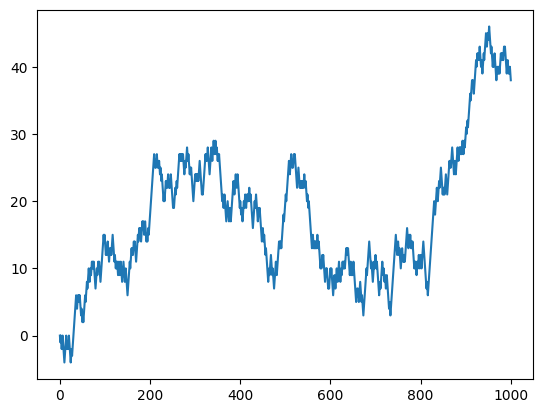

In [292]:
# Simulating random walk with Python only
import random
position = 0
walk = [position]
nsteps = 1_000

for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk)

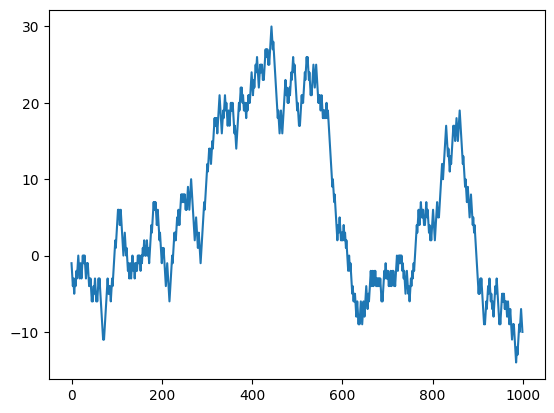

In [293]:
# simulating random walk with NumPy
nsteps = 1_000
draws = rng.integers(0, 2, size = nsteps)
steps = np.where(draws == 1, 1, -1)
walk = steps.cumsum()
plt.plot(walk)

In [297]:
print(f"min step: {walk.min()}")
print(f"max step: {walk.max()}")

# How many steps did it take to reach abs >= 10
(np.abs(walk) >= 10).argmax()

min step: -14
max step: 30


np.int64(69)

In [302]:
# Simulating multiple random walks
nwalks = 5_000
nsteps = 1_000

draws = rng.integers(0, 2, size=(nwalks, nsteps))
print(draws.shape)
steps = np.where(draws==1, 1, -1)
walks = steps.cumsum(axis=1)
walks

(5000, 1000)


array([[ -1,   0,  -1, ..., -62, -61, -62],
       [  1,   2,   3, ...,  20,  21,  20],
       [  1,   0,   1, ..., -16, -17, -18],
       ...,
       [ -1,   0,   1, ...,  -2,  -3,  -2],
       [ -1,   0,  -1, ..., -46, -45, -46],
       [  1,   2,   1, ..., -22, -23, -24]], shape=(5000, 1000))

In [324]:
# overall max and min steps
print(walks.max())
print(walks.min())

# how many walks exceeded 30 steps in either direction
hits30 = (np.abs(walks) >= 30).any(axis=1)
n_hits = np.sum(hits30)
print(f"Number of walks exceeding 30 steps: {n_hits}")

# identify the steps for those walks exceeding 30
crossing_steps = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

# compute average crossing steps
avg_crossing_steps = crossing_steps.mean()
print(f"On average, it takes {avg_crossing_steps:.0f} steps to exceed 30 threshold")

119
-110
Number of walks exceeding 30 steps: 3378
On average, it takes 501 steps to exceed 30 threshold
